## 1. See what data we got

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [11]:
class_list = [
    'dandere',
    'deredere',
    'himdere',
    'kundere',
    'tsundere',
    'yandere',
    'yangire'
]
TRAIN_PATH = ".\dataset\waifus\waifus_images\waifus_images_train"

In [ ]:
class_list

In [5]:
path = "./dataset/waifus/waifus_images/waifus_images_train/Dandere/Kosaki Onodera40.png"

In [6]:
w = cv2.imread(path, 3)
RGB_img = cv2.cvtColor(w, cv2.COLOR_BGR2RGB)

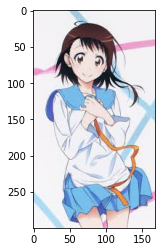

In [7]:
plt.imshow(RGB_img)

In [8]:
RGB_img.shape, type(RGB_img)

((300, 168, 3), numpy.ndarray)

In [12]:
os.listdir(TRAIN_PATH)

['Dandere',
 'Deredere',
 'himedere',
 'Kundere',
 'Tsundere',
 'Yandere',
 'Yangire']

In [41]:
import os, random

In [60]:
imgs = [os.path.join(TRAIN_PATH, "tsundere")+'/'+ran for ran in random.shuffle(os.listdir(os.path.join(TRAIN_PATH, i)))]

TypeError: 'NoneType' object is not iterable

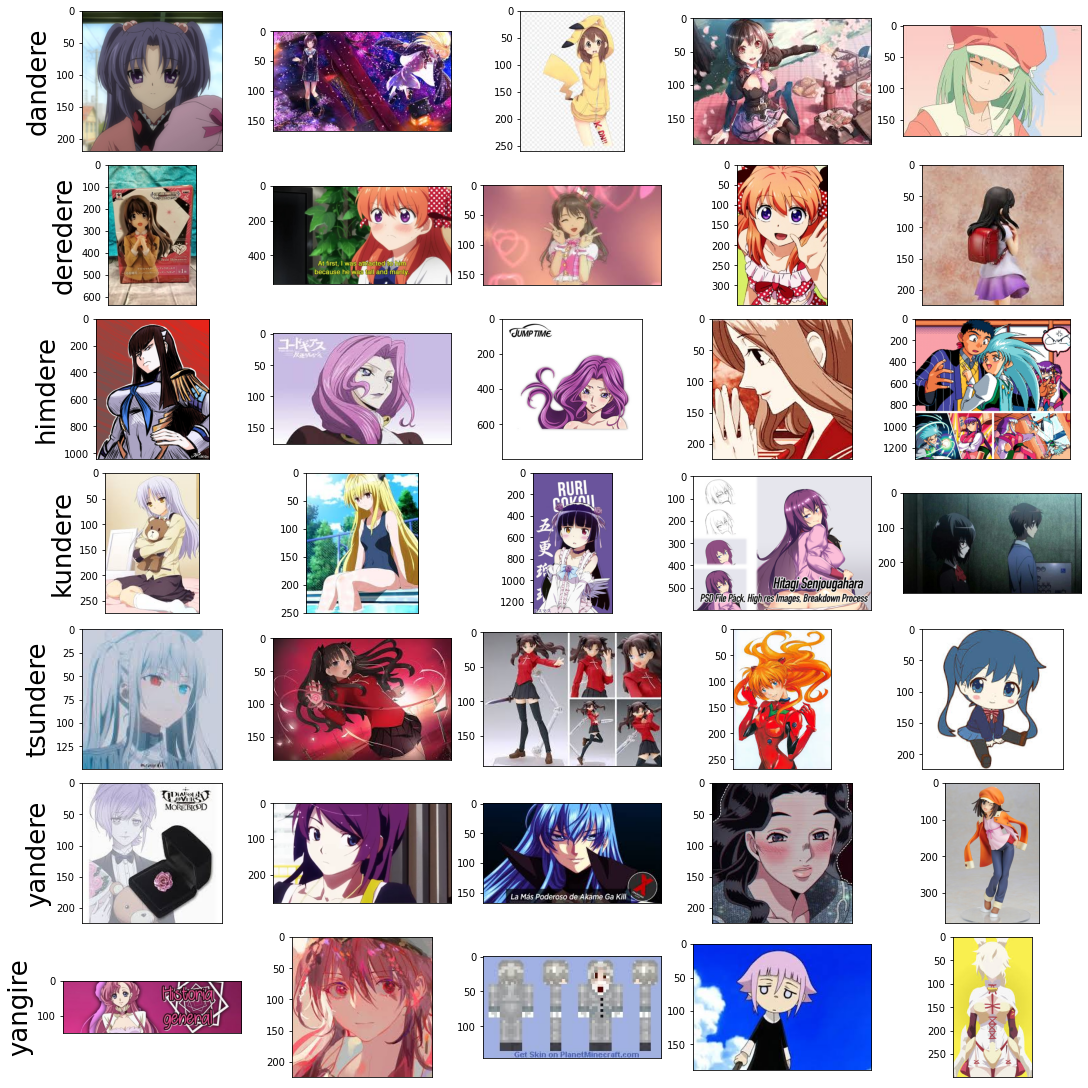

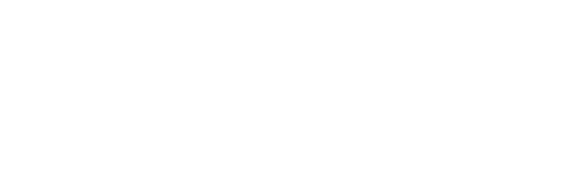

In [75]:
## Print out images
fig, axs = plt.subplots(7,5, figsize=(15,15), constrained_layout=True)
fig = plt.figure(figsize=(10,3))

for ax, row in zip(axs[:,0], class_list):
    ax.set_ylabel(row, rotation=90, fontsize=26)

a, b = 0, 0
for i in os.listdir(TRAIN_PATH):
    imgs = os.listdir(os.path.join(TRAIN_PATH, i))
    random.shuffle(imgs)
    for j in imgs:
        img2 = cv2.imread(os.path.join(TRAIN_PATH, i, j))
        try:
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        except:
            print(os.path.join(TRAIN_PATH, i, j))
            continue
        rm = axs[a][b].imshow(img2)
        plt.axis('off')
        rm.axes.get_xaxis().set_visible(False)
#         rm.axes.get_yaxis().set_visible(False)
        b+=1
        if b>4:
            b=0
            break
    a+=1
    if a>6:
        break

**NOTE:** Use image size: 224,224 or 256,256 (since we ain't got chad GPUs)

In [76]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
from tqdm import tnrange,tqdm_notebook, tqdm

In [77]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Transform training data

In [78]:
transformations = transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transformations_test = transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder("./dataset/waifus/waifus_images/waifus_images_train/", transform = transformations)
train_loader = DataLoader(dataset = train_dataset, batch_size = 16,shuffle=True)
items = iter(train_loader)
image, label = items.next()


test_dataset = torchvision.datasets.ImageFolder("./dataset/waifus/waifus_images/waifus_images_val/", transform=transformations_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16,
                                         shuffle=True)


print(len(train_dataset))

13925


In [80]:
items = iter(train_loader)
image, label = items.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


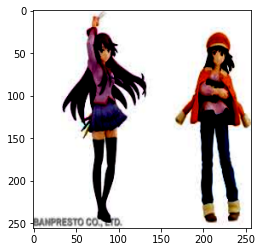

In [82]:
plt.imshow(np.transpose(image[10], (1,2,0)))

## The Model:

In [86]:
class Net(nn.Module):
    def __init__(self):
        
        super(Net, self).__init__()
        
        self.pool = nn.MaxPool2d(5, 5)
        
        self.conv1 = nn.Conv2d(3, 6, 7)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 16, 3)
        
        self.fc1 = nn.Linear(16, 7)
        #self.fc2 = nn.Linear(500, 50)
        #self.fc3 = nn.Linear(50, 7)

    def forward(self, x):
        
        # Conv layer 1
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Conv layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Conv layer 3
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)

        #print("Tensor shape: ",x.shape)
        
        # Flatten the batch
        x = x.view(x.size(0),-1)
        #print(x.shape)
        
        # Dense layer 1
        x = self.fc1(x)
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        return x

In [87]:
net =  Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [84]:
items = iter(train_loader)
image, label = items.next()

In [88]:
x = net(image[0].unsqueeze(0))

D:\Coding\myrepos\Computer-Vision\dereenv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [89]:
x.shape

torch.Size([1, 7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


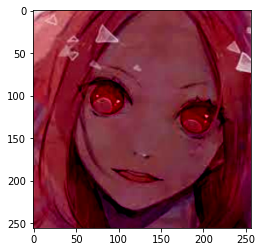

In [90]:
plt.imshow(np.transpose(image[0], (1,2,0)))

In [ ]:
label[0]

## Steps
- pass imgae to the NN
- calculate loss
- backprop
- update weights

In [91]:
def train_step(model, images, labels, loss_func, optim, device):
    
    optim.zero_grad()
    outputs = model(images.to(device))
    loss = loss_func(outputs, labels.to(device))
    loss.backward()
    optim.step()
    return loss.cpu().item()

In [92]:
def epoch(model, train_loader, loss_func, optim, device):
    mean_loss = 0
    model = model.to(device)
    for image, label in tqdm(train_loader):
        loss = train_step(model, image, label, loss_func, optim, device)
        mean_loss += loss/len(train_loader)
    return mean_loss

In [93]:
net =  Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [96]:
epoch(net, train_loader, criterion, optimizer, device="cuda")

  2%|█▋                                                                               | 18/871 [00:06<03:00,  4.73it/s]D:\Coding\myrepos\Computer-Vision\dereenv\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████| 871/871 [03:43<00:00,  3.90it/s]


1.9074843924847578

In [100]:
res = net(image[0].unsqueeze(0).cuda())

In [101]:
res

tensor([[-0.1173, -0.1199,  0.1329,  0.2926,  0.3461, -0.1499,  0.1409]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [102]:
label[0]

tensor(4)

In [109]:
res.cpu().data.numpy().argmax()

4

In [115]:
np.average([1,2,3])

2.0

In [116]:
tes = [1 if net(image[i].unsqueeze(0).cuda()).cpu().data.numpy().argmax() == label[i] else 0 for i in range(10)]

In [120]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-4.7650e-02,  7.7965e-02,  6.1381e-02, -4.2459e-02, -1.1829e-02,
                          3.4830e-02, -7.7022e-02],
                        [-1.3962e-02,  6.8885e-02, -1.6537e-02,  5.6191e-02, -3.6477e-02,
                         -6.6178e-02,  4.1583e-03],
                        [ 3.1963e-02, -1.4617e-02,  3.0298e-02, -5.5396e-02, -1.7704e-04,
                         -2.9664e-03,  5.2326e-03],
                        [ 3.5460e-02,  6.9157e-02, -5.5254e-02, -7.4308e-03,  4.4056e-02,
                         -4.7191e-03, -7.6123e-02],
                        [ 2.9503e-03,  7.0806e-02, -8.3984e-02,  3.2365e-02, -7.4138e-02,
                         -1.3867e-02, -6.8980e-02],
                        [-7.0695e-02,  2.5971e-02, -4.8771e-02, -6.1777e-02, -6.7494e-02,
                         -7.3755e-02, -6.3706e-02],
                        [ 7.0368e-02,  2.3675e-02, -7.7775e-02,  7.4999e-02,  4.9906e-02,
                          6.

In [122]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': tensor([[[[ 4.1772e-02,  4.6386e-02,  3.7139e-02,  2.8831e-02,  1.2046e-02,
               1.4159e-03,  1.7098e-03],
             [ 4.1783e-02,  4.1015e-02,  3.0438e-02,  1.6739e-02,  7.2340e-04,
              -3.8403e-03,  2.9342e-03],
             [ 3.3879e-02,  3.0395e-02,  2.2365e-02,  9.1122e-03,  6.5250e-04,
               4.7763e-03,  1.4419e-02],
             [ 3.0136e-02,  2.6518e-02,  1.7585e-02,  4.4089e-03,  8.9547e-04,
               2.3401e-03,  1.6563e-02],
             [ 3.0620e-02,  2.1740e-02,  7.7112e-03,  8.2436e-04, -4.4799e-03,
              -2.3937e-03,  1.4382e-02],
             [ 2.3280e-02,  1.6441e-02,  3.6832e-03, -2.9148e-03, -5.4497e-03,
              -5.6341e-04,  1.4410e-02],
             [ 1.2070e-02,  1.1348e-02,  7.1764e-03,  3.2737e-03,  6.9680e-04,
               3.9707e-03,  1.2335e-02]],
   
            [[ 4.8708e-02,  4.9983e-02,  3.8166e-02,  2.8286e-02,  1.0263e-02,
              -3.5417e-03, -4.7380e-03],
    

In [129]:
EPOCH = 1
PATH = "./dataset/waifus/models/"
MODEL1 = "3conv_3RLU_3MP2d_1d_crossentropy_sgd.pt"
LOSS = 1.9

In [130]:
torch.save({
    'epoch': EPOCH,
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': LOSS
}, 
    PATH+MODEL1)